In [6]:
import numpy as np
import os, json

### plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns

### STAN output
import arviz as az
from arviz.utils import Numba

plt.style.use("seaborn-whitegrid")

```
Error 2021/07/27
az.from_cmdstan
TypingError: Failed in nopython mode pipeline (step: nopython frontend)

Solution (https://arviz-devs.github.io/arviz/user_guide/Numba.html):
from arviz.utils import Numba
Numba.disable_numba() # Numba.enable_numba()
dat_output = az.from_cmdstan(posterior=[path-to-csv])
```

## Simulate trivial sample (v1)

In [7]:
FD_WRK="./"
Numba.disable_numba()

### get input
fdiry = os.path.join(FD_WRK, "input")
fname = "input_trivial_v1.json"
with open(os.path.join(fdiry, fname), "r") as file:
    dat_input = json.load(file)
    
### get output
fdiry = os.path.join(FD_WRK, "output")
fname = "output_trivial_v1.csv"
dat_output = az.from_cmdstan(posterior=os.path.join(fdiry, fname))
dat_output

Inference data with groups:
	> posterior
	> sample_stats

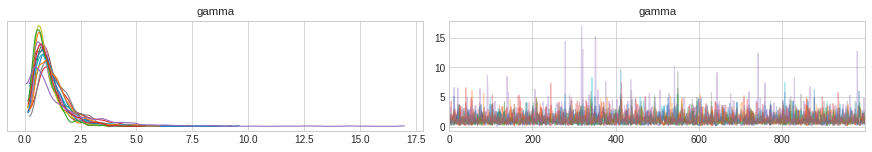

In [8]:
# traceplot
az.plot_trace(dat_output)
plt.show()

In [9]:
dat = dat_output
seg = dat.posterior.data_vars.get("gamma").to_series()
seg_true = dat_input["SEG_TRUE"]

print("TRUE  MEDIAN  MEAN  VAR  Q1   Q3")
for i in range(15):
    x = seg.loc[0,:,i]
    print("{:.2f}  {:.2f}    {:.2f}  {:.2f} {:.2f} {:.2f}".format(
        seg_true[i], 
        np.median(x), 
        np.mean(x), 
        np.var(x),
        np.quantile(x, 0.25),
        np.quantile(x, 0.75)))

TRUE  MEDIAN  MEAN  VAR  Q1   Q3
1.00  1.09    1.27  0.62 0.75 1.61
1.00  0.83    0.98  0.36 0.58 1.24
1.00  1.02    1.21  0.54 0.70 1.51
1.00  1.28    1.53  0.95 0.88 1.90
1.00  0.87    1.08  0.52 0.57 1.39
1.00  0.92    1.03  0.36 0.61 1.29
1.00  0.96    1.13  0.45 0.67 1.39
1.00  1.26    1.47  0.75 0.88 1.84
1.00  0.80    0.96  0.35 0.56 1.18
1.00  1.01    1.24  0.75 0.67 1.57
1.00  0.97    1.13  0.53 0.66 1.39
1.00  1.14    1.34  0.66 0.77 1.66
1.00  0.79    0.93  0.35 0.54 1.16
1.00  0.91    1.10  0.49 0.62 1.37
1.00  0.96    1.60  3.39 0.51 2.00


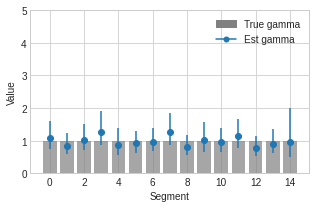

In [10]:
x = np.arange(15)
y = seg_true
y_q2 = np.array([np.median(  seg.loc[0,:,i])       for i in range(15)])
y_q1 = np.array([np.quantile(seg.loc[0,:,i], 0.25) for i in range(15)])
y_q3 = np.array([np.quantile(seg.loc[0,:,i], 0.75) for i in range(15)])

lower_error = y_q2 - y_q1
upper_error = y_q3 - y_q2
error = [lower_error, upper_error]

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5,3))
ax.bar(x, y, color="Grey", alpha=0.7)
ax.errorbar(x, y_q2, yerr=error, fmt='o')
ax.set_ylim(0, 5)
ax.set_xlabel("Segment")
ax.set_ylabel("Value")

### set legend
lgd1 = mpatches.Patch(color='Grey', label='True gamma')
lgd2 = mlines.Line2D(
    [], [], 
    color='#1f77b4', 
    marker='o',
    markersize=5, 
    label='Est gamma')
plt.legend(handles=[lgd1, lgd2])
plt.show()

## Simulate trivial sample (v2)

In [11]:
FD_WRK="./"
Numba.disable_numba()

### get input
fdiry = os.path.join(FD_WRK, "input")
fname = "input_trivial_v2.json"
with open(os.path.join(fdiry, fname), "r") as file:
    dat_input = json.load(file)
    
### get output
fdiry = os.path.join(FD_WRK, "output")
fname = "output_trivial_v2.csv"
dat_output = az.from_cmdstan(posterior=os.path.join(fdiry, fname))
dat_output

Inference data with groups:
	> posterior
	> sample_stats

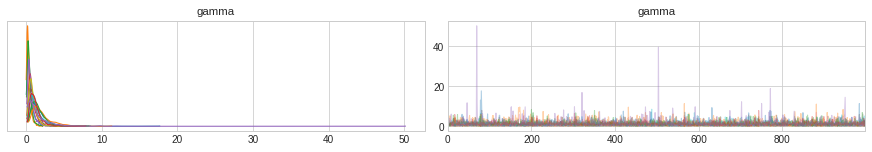

In [12]:
# traceplot
az.plot_trace(dat_output)
plt.show()

In [13]:
dat = dat_output
seg = dat.posterior.data_vars.get("gamma").to_series()
seg_true = dat_input["SEG_TRUE"]

print("TRUE  MEDIAN  MEAN  VAR  Q1   Q3")
for i in range(15):
    x = seg.loc[0,:,i]
    print("{:.2f}  {:.2f}    {:.2f}  {:.2f} {:.2f} {:.2f}".format(
        seg_true[i], 
        np.median(x), 
        np.mean(x), 
        np.var(x),
        np.quantile(x, 0.25),
        np.quantile(x, 0.75)))

TRUE  MEDIAN  MEAN  VAR  Q1   Q3
0.30  0.44    0.63  0.35 0.25 0.79
0.40  0.29    0.37  0.08 0.18 0.48
0.50  0.39    0.47  0.10 0.26 0.60
0.60  0.68    0.84  0.32 0.47 1.05
0.70  0.54    0.65  0.23 0.35 0.80
0.80  0.87    1.09  0.65 0.55 1.34
0.90  1.08    1.30  0.69 0.71 1.64
1.00  1.11    1.27  0.55 0.77 1.59
1.10  0.77    0.90  0.32 0.54 1.13
1.20  1.10    1.36  0.91 0.72 1.74
1.30  1.47    1.79  1.85 0.93 2.23
1.40  1.78    2.18  2.10 1.19 2.69
1.50  1.43    1.66  1.02 0.98 2.07
1.60  1.06    1.26  0.67 0.72 1.55
1.70  1.07    1.72  7.21 0.57 2.02


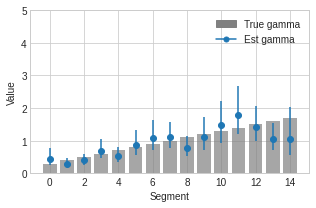

In [14]:
x = np.arange(15)
y = seg_true
y_q2 = np.array([np.median(  seg.loc[0,:,i])       for i in range(15)])
y_q1 = np.array([np.quantile(seg.loc[0,:,i], 0.25) for i in range(15)])
y_q3 = np.array([np.quantile(seg.loc[0,:,i], 0.75) for i in range(15)])

lower_error = y_q2 - y_q1
upper_error = y_q3 - y_q2
error = [lower_error, upper_error]

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5,3))
ax.bar(x, y, color="Grey", alpha=0.7)
ax.errorbar(x, y_q2, yerr=error, fmt='o')
ax.set_ylim(0, 5)
ax.set_xlabel("Segment")
ax.set_ylabel("Value")

### set legend
lgd1 = mpatches.Patch(color='Grey', label='True gamma')
lgd2 = mlines.Line2D(
    [], [], 
    color='#1f77b4', 
    marker='o',
    markersize=5, 
    label='Est gamma')
plt.legend(handles=[lgd1, lgd2])
plt.show()

## Simulate trivial sample (v3)

In [15]:
FD_WRK="./"
Numba.disable_numba()

### get input
fdiry = os.path.join(FD_WRK, "input")
fname = "input_trivial_v3.json"
with open(os.path.join(fdiry, fname), "r") as file:
    dat_input = json.load(file)
    
### get output
fdiry = os.path.join(FD_WRK, "output")
fname = "output_trivial_v3.csv"
dat_output = az.from_cmdstan(posterior=os.path.join(fdiry, fname))
dat_output

Inference data with groups:
	> posterior
	> sample_stats

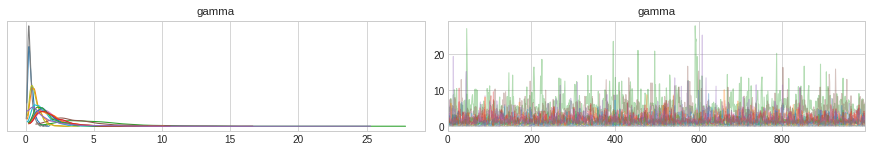

In [16]:
# traceplot
az.plot_trace(dat_output)
plt.show()

In [17]:
dat = dat_output
seg = dat.posterior.data_vars.get("gamma").to_series()
seg_true = dat_input["SEG_TRUE"]

print("TRUE  MEDIAN  MEAN  VAR  Q1   Q3")
for i in range(15):
    x = seg.loc[0,:,i]
    print("{:.2f}  {:.2f}    {:.2f}  {:.2f} {:.2f} {:.2f}".format(
        seg_true[i], 
        np.median(x), 
        np.mean(x), 
        np.var(x),
        np.quantile(x, 0.25),
        np.quantile(x, 0.75)))

TRUE  MEDIAN  MEAN  VAR  Q1   Q3
0.57  0.33    0.39  0.05 0.23 0.50
0.79  0.67    0.77  0.19 0.47 0.98
4.75  4.70    5.42  10.91 3.21 6.53
1.07  1.58    1.82  1.12 1.07 2.35
1.14  1.43    1.67  1.09 0.94 2.07
5.56  3.28    3.89  5.27 2.36 4.82
1.59  1.65    1.89  1.09 1.18 2.36
0.28  0.28    0.32  0.03 0.20 0.39
0.50  0.61    0.70  0.17 0.42 0.90
0.64  1.05    1.24  0.60 0.68 1.55
3.40  1.42    1.70  1.11 1.01 2.10
1.43  1.62    1.90  1.44 1.07 2.33
1.49  1.28    1.51  0.84 0.87 1.86
1.12  1.66    1.94  1.36 1.14 2.45
0.57  0.97    1.68  4.57 0.52 2.00


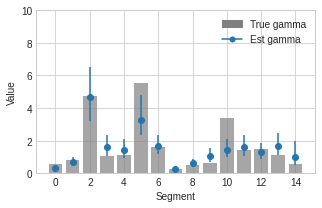

In [19]:
x = np.arange(15)
y = seg_true
y_q2 = np.array([np.median(  seg.loc[0,:,i])       for i in range(15)])
y_q1 = np.array([np.quantile(seg.loc[0,:,i], 0.25) for i in range(15)])
y_q3 = np.array([np.quantile(seg.loc[0,:,i], 0.75) for i in range(15)])

lower_error = y_q2 - y_q1
upper_error = y_q3 - y_q2
error = [lower_error, upper_error]

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5,3))
ax.bar(x, y, color="Grey", alpha=0.7)
ax.errorbar(x, y_q2, yerr=error, fmt='o')
ax.set_ylim(0, 10)
ax.set_xlabel("Segment")
ax.set_ylabel("Value")

### set legend
lgd1 = mpatches.Patch(color='Grey', label='True gamma')
lgd2 = mlines.Line2D(
    [], [], 
    color='#1f77b4', 
    marker='o',
    markersize=5, 
    label='Est gamma')
plt.legend(handles=[lgd1, lgd2])
plt.show()

## Simulate trivial sample (v4)

In [20]:
FD_WRK="./"
Numba.disable_numba()

### get input
fdiry = os.path.join(FD_WRK, "input")
fname = "input_trivial_v4.json"
with open(os.path.join(fdiry, fname), "r") as file:
    dat_input = json.load(file)
    
### get output
fdiry = os.path.join(FD_WRK, "output")
fname = "output_trivial_v4.csv"
dat_output = az.from_cmdstan(posterior=os.path.join(fdiry, fname))
dat_output

Inference data with groups:
	> posterior
	> sample_stats

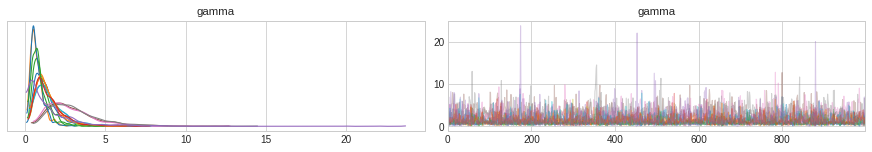

In [21]:
# traceplot
az.plot_trace(dat_output)
plt.show()

In [22]:
dat = dat_output
seg = dat.posterior.data_vars.get("gamma").to_series()
seg_true = dat_input["SEG_TRUE"]

print("TRUE  MEDIAN  MEAN  VAR  Q1   Q3")
for i in range(15):
    x = seg.loc[0,:,i]
    print("{:.2f}  {:.2f}    {:.2f}  {:.2f} {:.2f} {:.2f}".format(
        seg_true[i], 
        np.median(x), 
        np.mean(x), 
        np.var(x),
        np.quantile(x, 0.25),
        np.quantile(x, 0.75)))

TRUE  MEDIAN  MEAN  VAR  Q1   Q3
1.00  1.11    1.27  0.56 0.75 1.57
1.00  0.63    0.73  0.16 0.45 0.91
1.00  0.91    1.06  0.38 0.63 1.31
1.00  1.22    1.42  0.70 0.85 1.77
1.00  1.34    1.63  1.25 0.88 2.07
3.00  2.62    2.96  2.54 1.83 3.68
3.00  2.48    2.81  2.25 1.71 3.56
3.00  2.76    3.14  3.03 1.92 3.88
1.00  1.22    1.41  0.63 0.84 1.78
1.00  1.32    1.62  1.15 0.90 2.06
1.00  0.64    0.75  0.17 0.47 0.95
1.00  1.20    1.38  0.60 0.86 1.73
1.00  0.77    0.89  0.29 0.53 1.10
1.00  1.23    1.48  0.87 0.84 1.87
1.00  0.98    1.58  3.89 0.48 1.96


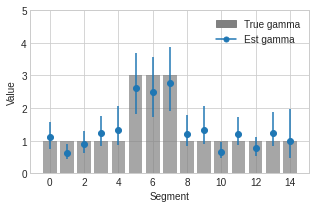

In [23]:
x = np.arange(15)
y = seg_true
y_q2 = np.array([np.median(  seg.loc[0,:,i])       for i in range(15)])
y_q1 = np.array([np.quantile(seg.loc[0,:,i], 0.25) for i in range(15)])
y_q3 = np.array([np.quantile(seg.loc[0,:,i], 0.75) for i in range(15)])

lower_error = y_q2 - y_q1
upper_error = y_q3 - y_q2
error = [lower_error, upper_error]

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5,3))
ax.bar(x, y, color="Grey", alpha=0.7)
ax.errorbar(x, y_q2, yerr=error, fmt='o')
ax.set_ylim(0, 5)
ax.set_xlabel("Segment")
ax.set_ylabel("Value")

### set legend
lgd1 = mpatches.Patch(color='Grey', label='True gamma')
lgd2 = mlines.Line2D(
    [], [], 
    color='#1f77b4', 
    marker='o',
    markersize=5, 
    label='Est gamma')
plt.legend(handles=[lgd1, lgd2])
plt.show()